In [3]:
import numpy as np

import pandas as pd

from tensorflow.keras.models import load_model

from umap import UMAP

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from modules.utils.general_utils import dirs_creation
from modules.utils.data_utils import embedding_extraction

In [4]:
plt.style.use('dark_background')

In [5]:
PROJECT_NAME = 'league'

In [6]:
targets_themes = pd.read_pickle(
    f'results\\objects\\{PROJECT_NAME}\\themes.pkl'
)
TARGET_DECODER = pd.read_pickle(
    f'results\\objects\\{PROJECT_NAME}\\target_decoder.pkl'
)

In [12]:
model = load_model(f'results\\models\\{PROJECT_NAME}')

encodes, targets, colors = embedding_extraction(
    model=model,
    project_name=PROJECT_NAME,
    target_decoder=TARGET_DECODER,
    colors_bins=20,
    extraction_point='features_extractor'
)

100%|████████████████████████████████████████████████████████████████████████████████| 561/561 [01:13<00:00,  7.66it/s]


In [6]:
dirs_to_create = [f'results\\figures\\{PROJECT_NAME}']
for dims in [2, 3]:
    
    dirs_to_create.append(f'results\\figures\\{PROJECT_NAME}\\{dims}D')
   
dirs_creation(
    dirs_to_create,
    wipe_dir=True
)

# 2D

### TARGET EMEBDDDING

In [7]:
matplotlib.interactive(False)
for target, theme in targets_themes.items():
    
    dirs_creation(
        [f'results\\figures\\{PROJECT_NAME}\\2D\\{target}'],
        wipe_dir=True
    )

    target_reduction = np.load(f'results\\objects\\{PROJECT_NAME}\\2D\\{target}.npy',)
    index = np.argwhere(targets == target).flatten()
    colors_target = colors[index]
    
    index_file = 0
    accumulating_color_indices = []

    for unique_color in np.unique(colors_target):
        
        accumulating_color_indices.extend(
            np.argwhere(colors_target == unique_color).flatten().tolist()
        )

        fig_target, ax_target = plt.subplots(figsize=(10, 10))
        ax_target.scatter(
            target_reduction[accumulating_color_indices, 0],
            target_reduction[accumulating_color_indices, 1],
            s=0.5,
            c=colors_target[accumulating_color_indices],
            cmap=theme,
            edgecolor='',
            marker='o'
        )
        ax_target.axis('off')

        ax_target.text(
            0.5,
            1,
            target.upper(),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax_target.transAxes,
            fontname='Microsoft Yi Baiti',
            size=20,
            weight=1000
        )

        fig_target.savefig(
            f'results\\figures\\{PROJECT_NAME}\\2D\\{target}\\{index_file}.png',
            dpi=400
        )
        plt.close('all')
        index_file += 1

### GALAXY EMBEDDING

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


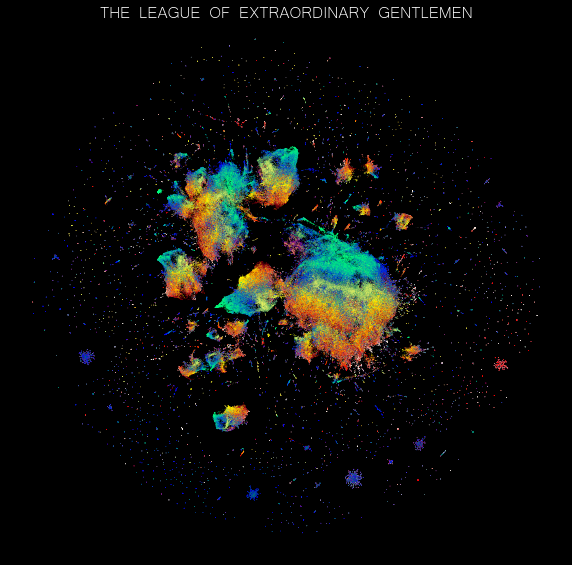

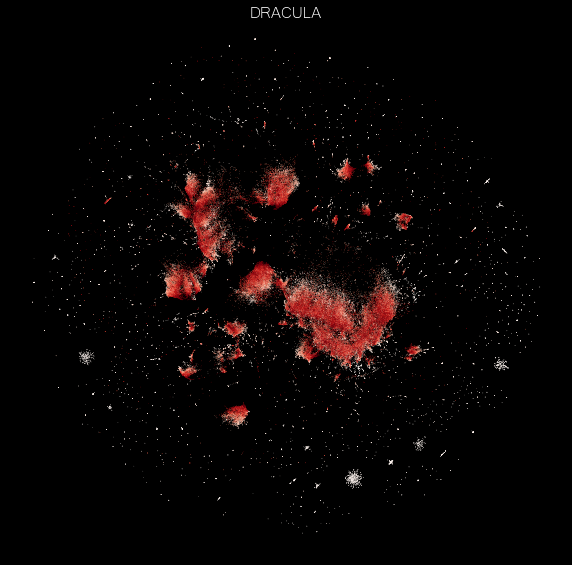

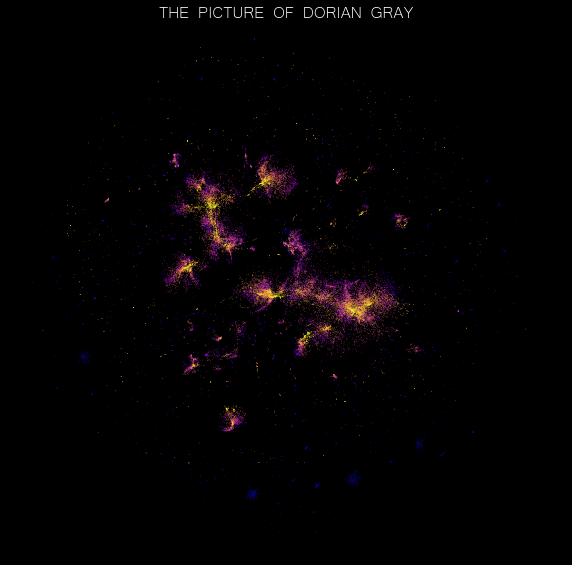

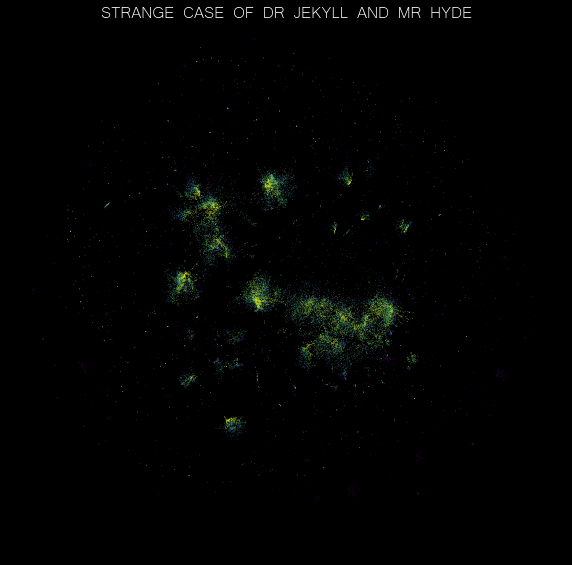

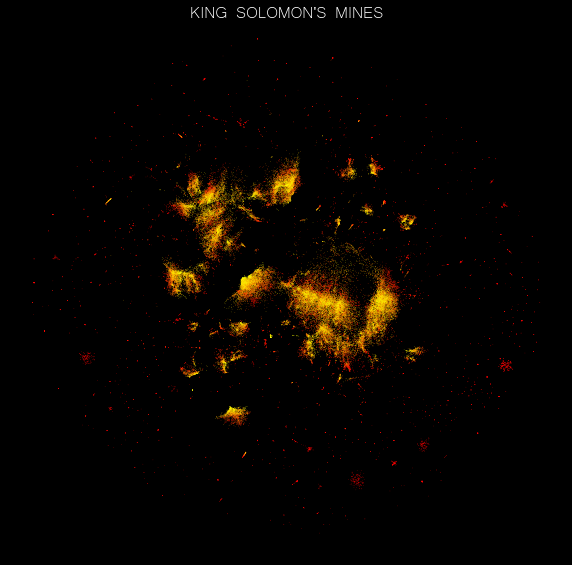

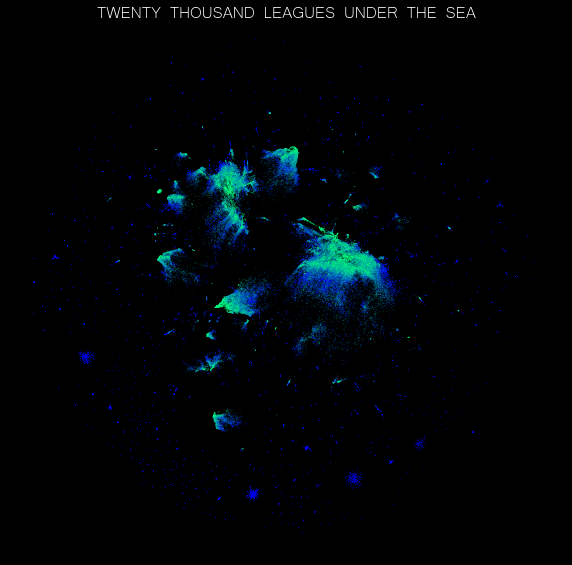

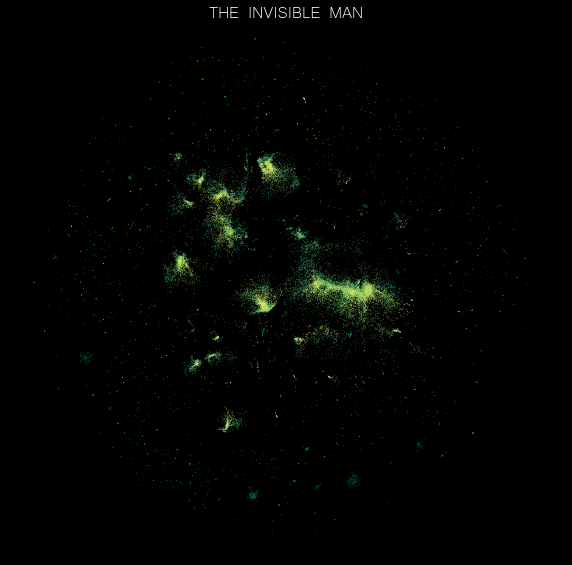

In [13]:
reduction = target_reduction = np.load(f'results\\objects\\{PROJECT_NAME}\\2D\\galaxy.npy',)

fig_main, ax_main = plt.subplots(figsize=(10, 10))
for target, theme in targets_themes.items():

    index = np.argwhere(targets == target).flatten()
    fig_sub, ax_sub = plt.subplots(figsize=(10, 10))
    ax_sub.scatter(
        reduction[:, 0][index],
        reduction[:, 1][index],
        s=0.25,
        c=colors[index],
        cmap=theme,
        edgecolor='',
        marker='o'
    )
    ax_sub.axis('off')

    ax_sub.text(
        0.5,
        1,
        target.upper(),
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax_sub.transAxes,
        fontname='Microsoft Yi Baiti',
        size=20,
        weight='bold'
    )
    fig_sub.savefig(
        f'results\\figures\\{PROJECT_NAME}\\2D\\galaxy_{target}.png',
        dpi=400
    )

    ax_main.scatter(
        reduction[:, 0][index],
        reduction[:, 1][index],
        s=0.25,
        c=colors[index],
        cmap=theme,
        edgecolor='',
        marker='o'
    )

    ax_main.axis('off')

ax_main.text(
    0.5,
    1,
    'THE LEAGUE OF EXTRAORDINARY GENTLEMEN',
    horizontalalignment='center',
    verticalalignment='center',
    transform=ax_main.transAxes,
    fontname='Microsoft Yi Baiti',
    size=20,
    weight='bold'
)
fig_main.savefig(
    f'results\\figures\\{PROJECT_NAME}\\2D\\galaxy.png',
    dpi=400
)
fig_main.show()

# 3D

### TARGET EMBEDDING

In [9]:
for target, theme in targets_themes.items():
    
    root = f'results\\figures\\{PROJECT_NAME}\\3D\\{target}'
    dirs_creation(
        [root],
        wipe_dir=True
    )
    index = np.argwhere(targets == target).flatten()
    
    target_reduction = np.load(f'results\\objects\\{PROJECT_NAME}\\3D\\{target}.npy',)

    fig_target = plt.figure(figsize=(10, 10))
    ax_target = fig_target.add_subplot(111, projection='3d')
    
    ax_target.scatter(
        target_reduction[:, 0],
        target_reduction[:, 1],
        target_reduction[:, 2],
        s=0.05,
        c=colors[index],
        cmap=theme,
        marker='o'
    )
    ax_target.axis('off')

    ax_target.text2D(
        0.5,
        1,
        target.upper(),
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax_target.transAxes,
        fontname='Microsoft Yi Baiti',
        size=20,
        weight=1000
    )
    
    for angle in range(0, 360, 2):
        
        ax_target.view_init(30, angle)
        fig_target.savefig(
            f'results\\figures\\{PROJECT_NAME}\\3D\\{target}\\{angle}.png',
            dpi=400
        )

### GALAXY EMBEDDING

In [10]:
reduction = target_reduction = np.load(f'results\\objects\\{PROJECT_NAME}\\3D\\galaxy.npy',)

root = f'results\\figures\\{PROJECT_NAME}\\3D\\galaxy'
dirs_creation(
    [root],
    wipe_dir=True
)

fig_main = plt.figure(figsize=(15, 15))
ax_main = fig_main.add_subplot(111, projection='3d')
for target, theme in targets_themes.items():
    
    root = f'results\\figures\\{PROJECT_NAME}\\3D\\galaxy_{target}'
    dirs_creation(
        [root],
        wipe_dir=True
    )

    index = np.argwhere(targets == target).flatten()
    fig_sub = plt.figure(figsize=(15, 15))
    ax_sub = fig_sub.add_subplot(111, projection='3d')
    
    ax_sub.scatter(
        reduction[:, 0][index],
        reduction[:, 1][index],
        reduction[:, 2][index],
        s=0.05,
        c=colors[index],
        cmap=theme,
        marker='o'
    )
    ax_sub.axis('off')

    ax_sub.text2D(
        0.5,
        1,
        target.upper(),
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax_sub.transAxes,
        fontname='Microsoft Yi Baiti',
        size=20,
        weight='bold'
    )
    
    for angle in range(0, 360, 2):

        ax_sub.view_init(30, angle)
        fig_sub.savefig(
            f'results\\figures\\{PROJECT_NAME}\\3D\\galaxy_{target}\\{angle}.png',
            dpi=400
        )

    ax_main.scatter(
        reduction[:, 0][index],
        reduction[:, 1][index],
        reduction[:, 2][index],
        s=0.05,
        c=colors[index],
        cmap=theme,
        marker='o'
    )

    ax_main.axis('off')

ax_main.text2D(
    0.5,
    1,
    'A GALAXY OF BOOKS',
    horizontalalignment='center',
    verticalalignment='center',
    transform=ax_main.transAxes,
    fontname='Microsoft Yi Baiti',
    size=20,
    weight='bold'
)
for angle in range(0, 360, 2):

    ax_main.view_init(30, angle)
    fig_main.savefig(
        f'results\\figures\\{PROJECT_NAME}\\3D\\galaxy\\{angle}.png',
        dpi=400
    )